<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab" data-toc-modified-id="Colab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colab</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading" data-toc-modified-id="Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading</a></span><ul class="toc-item"><li><span><a href="#extra-one-hot-features" data-toc-modified-id="extra-one-hot-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>extra one-hot features</a></span></li><li><span><a href="#extra-keywords" data-toc-modified-id="extra-keywords-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>extra keywords</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BERT</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TextCNN" data-toc-modified-id="TextCNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TextCNN</a></span><ul class="toc-item"><li><span><a href="#notes:" data-toc-modified-id="notes:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>notes:</a></span></li></ul></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSTM</a></span></li></ul></div>

# Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Text-Classification/code")
!pip install pyLDAvis
!pip install gensim
!pip install pandas==1.3.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import 

In [7]:
from classification_utils import *
from clustering_utils import *
from eda_utils import *
from nn_utils_keras import *
from feature_engineering_utils import *

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Loading

In [8]:
train, test = load_data(only_stem_voc=True)
# train, upsampling_info = upsampling_train(train)

train_text, train_label = train_augmentation(train, select_comb=None)
test_text, test_label = test['text'], test['label']

# test_text = test_text.apply(lambda x: extract_stem_voc(x))
# train_text = train_text.apply(lambda x: extract_stem_voc(x))
# train_text.to_csv("stem_voc_train.csv")
# test_text.to_csv("stem_voc_test.csv")

# train_text, test_text = load_stem_voc()


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']


In [9]:
####################################
### label mapper
####################################
labels = sorted(train_label.unique())
label_mapper = dict(zip(labels, range(len(labels))))
train_label = train_label.map(label_mapper)
test_label = test_label.map(label_mapper)
y_train = train_label
y_test = test_label

print(train_text.shape)
print(test_text.shape)
print(train_label.shape)
print(test_label.shape)
print(labels)

(11083,)
(7761,)
(11083,)
(7761,)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


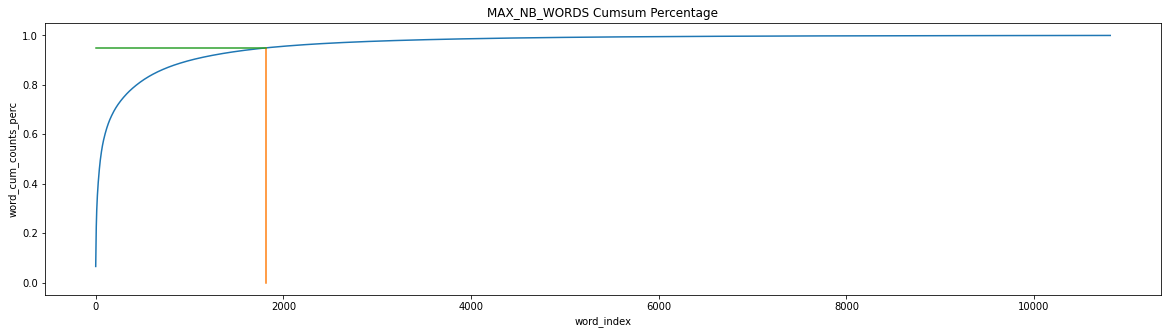

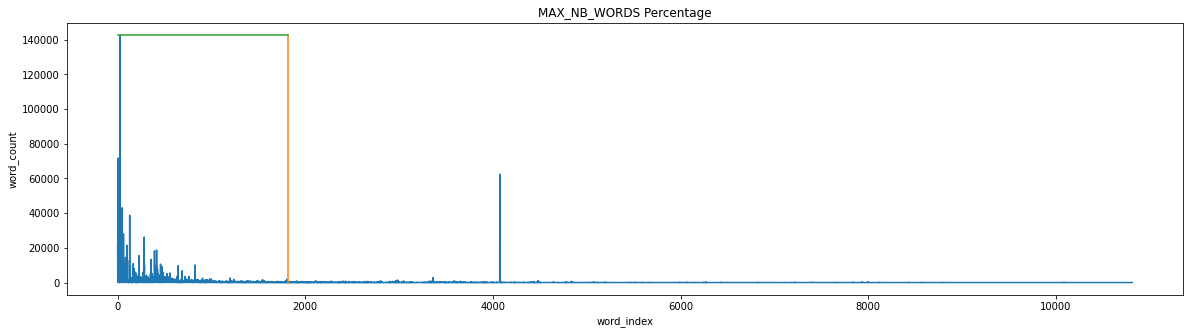

Cut index with 95.0 % of corpus:  1820 

    index  word   count
0      27   the  142476
1       6    to   71797
2      15    of   68191
3    4073    ax   62511
4      21   and   56944
5      28    in   47583
6      49    is   43091
7     129  that   38781
8      35    it   35601
9      63   for   28036
10    284   you   26258
11      0  from   22170
12    100    be   21418
13     40    on   19654
14    416  have   18766
15     25   are   18423
16    393   not   18290
17     44  with   17075
18    226    as   15577
19     85    or   14561


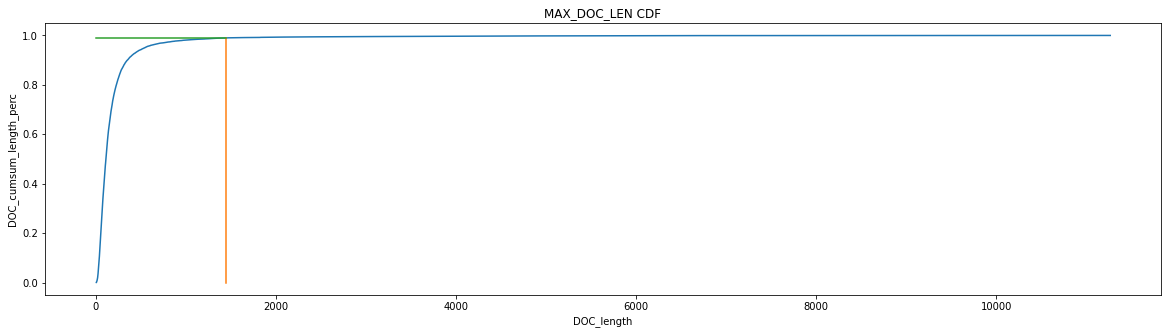

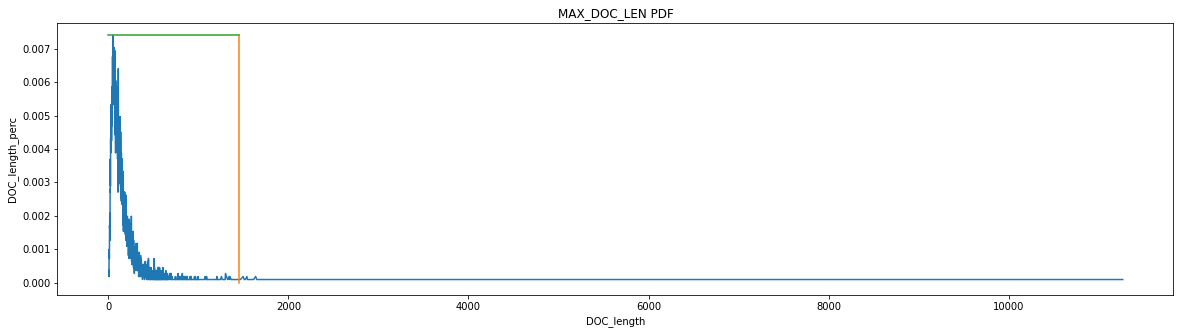

Cut index with 99.0 % of corpus:  1452


In [10]:
####################################
### hyper params 
####################################
filters = '"#$%&()*+,-/:;<=>@[\\]^_`{|}~\t\n0123465789!.?\''
MAX_NB_WORDS_ratio = 0.95
MAX_DOC_LEN_ratio = 0.99
MAX_NB_WORDS = eda_MAX_NB_WORDS(train_text, ratio=MAX_NB_WORDS_ratio, char_level=False, filters=filters)
MAX_DOC_LEN = eda_MAX_DOC_LEN(train_text, ratio=MAX_DOC_LEN_ratio, char_level=False, filters=filters)

In [11]:
X_train, X_test, word_to_idx, tfidf_vect = tfidf_vectorizer(train_text, test_text, stop_words=True, binary=True, min_df=5)
# X_train, transform_mapper = dimension_reduction(X_train, out_dim=1000) # not allow negative 
# X_test = transform_mapper.transform(X_test)

num of words: 5678


## extra one-hot features

In [12]:
# one_hot_X_train, one_hot_X_test, one_hot_word_to_idx, one_hot_count_vect = count_vectorizer(
#     train['Subject']+" " + train['Organization'], test['Subject']+" " + test['Organization'], stop_words=True, binary=False, min_df=3, max_df=0.001)

## extra keywords

In [13]:
# label_docs = train.groupby('label')['text'].apply(lambda x: " ".join(x)) # 要去除标点符号
# dtm, _, label_word_to_idx, _ = count_vectorizer(label_docs, [''], stop_words=True, min_df=1, binary=True)
# label_idx_to_word = dict([val, key] for key, val in label_word_to_idx.items())
# keywords_threshold = 1
# keywords_idx = np.where(dtm.sum(axis=0)<=keywords_threshold)[0]
# print(" keywords_idx shape: ")
# voc = [label_idx_to_word[idx] for idx in keywords_idx]

# keywords_X_train, keywords_X_test, keywords_word_to_idx, keywords_count_vect = count_vectorizer(
#     train['text'], test['text'], voc=voc, stop_words=True, min_df=1, binary=True)

In [14]:
_X_train = np.hstack([X_train])
_X_test = np.hstack([X_test])
# _X_train = np.hstack([X_train, one_hot_X_train, keywords_X_train])
# _X_test = np.hstack([X_test, one_hot_X_test, keywords_X_test])

# BERT

In [15]:
!pip install transformers
!pip install torchinfo
from transformers import BertTokenizer, BertModel, AdamW, BertConfig, get_linear_schedule_with_warmup
from bert_utils.training_utils import extract_contextual_embedding, train_multi_label_model, model_eval
from bert_utils import glovar 
from bert_utils.data_loader import  BERT_data_loader
# from bert_utils.maml_training_utils import MAML_train, history_vis 
from bert_utils.maml_dataloader import MAML_Data_loader, MAML_train_val_split
from torchinfo import summary
from bert_utils.model2 import clf, lstm_cnn_o2
from model import lstm_cnn_o1

Append path:  /content/drive/MyDrive/Text-Classification/code/bert_utils
My Linux system:  Linux
using:  cuda
My Linux system:  Linux
using:  cuda


In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained("bert-base-uncased", output_attentions = True, output_hidden_states = True)

# global device
device = glovar.device_type
bert_model = bert_model.to(device)

print(next(bert_model.parameters()).device)  # 输出：cpu
summary(bert_model)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda:0


Layer (type:depth-idx)                             Param #
BertModel                                          --
├─BertEmbeddings: 1-1                              --
│    └─Embedding: 2-1                              23,440,896
│    └─Embedding: 2-2                              393,216
│    └─Embedding: 2-3                              1,536
│    └─LayerNorm: 2-4                              1,536
│    └─Dropout: 2-5                                --
├─BertEncoder: 1-2                                 --
│    └─ModuleList: 2-6                             --
│    │    └─BertLayer: 3-1                         7,087,872
│    │    └─BertLayer: 3-2                         7,087,872
│    │    └─BertLayer: 3-3                         7,087,872
│    │    └─BertLayer: 3-4                         7,087,872
│    │    └─BertLayer: 3-5                         7,087,872
│    │    └─BertLayer: 3-6                         7,087,872
│    │    └─BertLayer: 3-7                         7,087,872
│    │   

In [17]:
MAX_DOC_LEN = 200

In [18]:
embed_dim = 768
max_len = min(512, MAX_DOC_LEN)
hidden_units = 10
num_filters = 10
kernel_sizes = [1,2,3]
label_size = 20
model_path = 'bert_cnn'

In [ ]:
_, input_ids, sentences_encoding = extract_contextual_embedding(train_text, tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=False)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
 58%|█████▊    | 6378/11083 [01:08<00:50, 94.01it/s]

In [ ]:
np.save('sentences_encoding.npy', sentences_encoding)
np.save('input_ids.npy', input_ids)
# sentences_encoding = np.load('sentences_encoding.npy', mmap_mode='r')
# input_ids = np.load('input_ids.npy', mmap_mode='r')

In [ ]:
 
if MAML is True:
    model = lstm_cnn_o1(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
elif "cnn" in model_path:
    model = lstm_cnn_o2(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
else:
    model = clf(embed_dim, max_len, hidden_units, label_size)

# model.load_state_dict(torch.load(model_path))
model.to(device)

In [ ]:
one_hot_labels = to_categorical(y_train)
learning_rate = 0.001
epochs = 10
patience = 4

In [ ]:
testing = False

In [ ]:
# Data Loader
dataloader, validation_dataloader = BERT_data_loader(sentences_encoding, input_ids, one_hot_labels, batch_size, random_state=12345, test_size=0.1, testing=testing)

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
total_steps = len(dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(total_steps * 0.1), num_training_steps=total_steps)
model, training_stats = train_multi_label_model(model, label_size, label_cols, dataloader, validation_dataloader, optimizer=optimizer, scheduler=scheduler, epochs=epochs, patience=patience, model_path=model_path)

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
# df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
df_stats.to_csv(model_path[0:-2] + 'csv')

print('num of samples: ', sentences_encoding.shape[0])

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.legend()
# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(list(range(1, epochs + 1)))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Load the dataset into a pandas dataframe.
def generate_classification_report(test_file):
    if 'txt' in test_file:
        df = pd.read_csv(os.path.join('data', 'test', test_file), sep='|')
    else:
        df = pd.read_excel(os.path.join('data', 'test', test_file))

    df = df.dropna()
    sentences = df.sentence.values
    labels = df.label.values

    # get embedding
    _, _, x = extract_contextual_embedding(sentences, tokenizer, bert_model, max_len = max_len)
    x = torch.tensor(x, dtype=training_dtype).to(device)
    with torch.no_grad():
        preds = maml(x).view(-1).detach().cpu().numpy()

    print(classification_report(labels, preds>=0.5))
    return labels, preds

test_file = 'surprise_dt_test_v9_all_kiera.xlsx'
l, p = generate_classification_report(test_file)